In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Basic manipulations.


## 1. Pointwise.
a. Unary.

In [ ]:
n = 3
data = np.arange(start=10, stop=40, step=10) 
x = pd.Series(data=data, index=pd.period_range(start="0001", periods=n, freq="Y"))
x


1    10
2    20
3    30
Freq: A-DEC, dtype: int64

In [ ]:
x.index

PeriodIndex(['1', '2', '3'], dtype='period[A-DEC]', freq='A-DEC')

i. Multiplication by constant.


In [ ]:
multipliedX = 2 * x
multipliedX

1    20
2    40
3    60
Freq: A-DEC, dtype: int64

ii. Logarithm.

In [ ]:
logarithmedX = np.log(x)
logarithmedX

1    2.302585
2    2.995732
3    3.401197
Freq: A-DEC, dtype: float64

In [ ]:
# Another way, using DataFrame
logarithmedX = x.apply(np.log)
logarithmedX

1    2.302585
2    2.995732
3    3.401197
Freq: A-DEC, dtype: float64

In [ ]:
type(logarithmedX)

pandas.core.series.Series

iii. Subtract average (demean or center)

In [ ]:
centeredX = x - x.mean()
sum(centeredX), centeredX.mean()

(0.0, 0.0)

## b. binary.
i. Plus

In [ ]:
data2 = np.array([100, 200, 300]) 
y = pd.Series(data=data2, index=pd.period_range(start="0001", periods=n, freq="Y"))
# To add time series, we need to match their indexes
myAddition = x + y
myAddition

1    110
2    220
3    330
Freq: A-DEC, dtype: int64

ii. Minus, ...

In [ ]:
mySubtraction = x - y
mySubtraction.index
# dir(mySubtraction)

PeriodIndex(['1', '2', '3'], dtype='period[A-DEC]', freq='A-DEC')

## 2. Non-local


a. Backshift
```
x[1] = 10 = xBackshifted[2]
```
So positive periods argument correxponds to backshift. 
It is the opposite to situation in R:
```
xForwardShiftedSmart = x.shift(freq="Y", periods=-1) # Python
```
is the same as 
```
forwardShiftedX = lag(x, k=1) # R
```

In [ ]:
x

1    10
2    20
3    30
Freq: A-DEC, dtype: int64

In [ ]:
xBackShifted = x.shift(periods=1)
xBackShifted.index

PeriodIndex(['1', '2', '3'], dtype='period[A-DEC]', freq='A-DEC')

In [ ]:
xBackShifted

1     NaN
2    10.0
3    20.0
Freq: A-DEC, dtype: float64

Now the same backward shift, but in an R way, without loss of values. 


In [ ]:
xBachshiftedSMart = x.shift(freq="Y", periods=1)
xBachshiftedSMart.index

PeriodIndex(['2', '3', '4'], dtype='period[A-DEC]', freq='A-DEC')

In [ ]:
xBachshiftedSMart

2    10
3    20
4    30
Freq: A-DEC, dtype: int64

b. Forward shift

In [ ]:
xForwardShifted = x.shift(periods=-1)
xForwardShifted.index

PeriodIndex(['1', '2', '3'], dtype='period[A-DEC]', freq='A-DEC')

In [ ]:
xForwardShifted

1    20.0
2    30.0
3     NaN
Freq: A-DEC, dtype: float64

Again the same forward shift, but in an R way, without loss of values.

In [ ]:
xForwardShiftedSmart = x.shift(freq="Y", periods=-1)
xForwardShiftedSmart.index

PeriodIndex(['0', '1', '2'], dtype='period[A-DEC]', freq='A-DEC')

In [ ]:
xForwardShiftedSmart

0    10
1    20
2    30
Freq: A-DEC, dtype: int64

## c. Higher order back shift B^d

How it was in R:
```
d = 5
higherOrderBackShiftedX = lag(x = x, k = -d)
time(higherOrderBackShiftedX)
------ 
Time Series:
Start = 6 
End = 8 
Frequency = 1 
[1] 6 7 8
```
First, direct naive way in Python. 

Note, we change the sign of d, comparing to R.

In [ ]:
d = 5
higherOrderBackShiftedX = x.shift(periods=d)
higherOrderBackShiftedX

1   NaN
2   NaN
3   NaN
Freq: A-DEC, dtype: float64

In [ ]:
higherOrderBackShiftedX.index

PeriodIndex(['1', '2', '3'], dtype='period[A-DEC]', freq='A-DEC')

Now smarter way in Python

In [ ]:
higherOrderBackShiftedXsmart = x.shift(periods=d, freq='Y')
higherOrderBackShiftedXsmart

6    10
7    20
8    30
Freq: A-DEC, dtype: int64

## b. Difference (1 - B),
How it was in R:
```
difX = diff(x)
difX
time(difX)
```


In [ ]:
difX = x.diff()
difX

1     NaN
2    10.0
3    10.0
Freq: A-DEC, dtype: float64

In [ ]:
difXreduced = difX.dropna()
difXreduced

2    10.0
3    10.0
Freq: A-DEC, dtype: float64

Explicit lag.

How it was in R:
```
diff(x = x, lag = 1)
```
We do not need to put a minus here.
For lag, the signs of lag argument are opposite in R and Python. 
We will see later that for difference, the signs of lag argument are the same in R and Python. 

In [ ]:
difX = x.diff(periods=1)
difX

1     NaN
2    10.0
3    10.0
Freq: A-DEC, dtype: float64

In R, it could not even accept the negative lag for some reason
```
diff(x = x, lag = -1)
```
But here Python can:

In [ ]:
difX = x.diff(periods=-1)
difX

1   -10.0
2   -10.0
3     NaN
Freq: A-DEC, dtype: float64

Zero lag was also unacceptable in R:
```
diff(x = x, lag = 0)
```
But here in Python, it is OK:

In [ ]:
difX = x.diff(periods=0)
difX

1    0.0
2    0.0
3    0.0
Freq: A-DEC, dtype: float64

Now we try to construct the difference. 
As in R, in both cases it became shorter.
And the time is as of the one of x, with first element cut off.

In [ ]:
constructedDifX = x - x.shift(periods = -1)
constructedDifX


1   -10.0
2   -10.0
3     NaN
Freq: A-DEC, dtype: float64

In [ ]:
constructedDifXreduced = constructedDifX.dropna()
constructedDifXreduced

1   -10.0
2   -10.0
Freq: A-DEC, dtype: float64

## Higher lag difference (1 - B^d). 
How it was in R:
```
k = 1
myDiff = diff(x, lag = k, differences = 2)
myDiff
time(myDiff)
```
Apparently, in Python you need to compose your higher order difference manually like difference of a difference. There is no 'differences' argument. 

In [ ]:
myDoubleDiff = x.diff(periods=1).diff(periods=1)
myDoubleDiff

1    NaN
2    NaN
3    0.0
Freq: A-DEC, dtype: float64

## i. Deterministic constant
In R, we did not necessarily need to use ts here.
Just vector was enough:
```
constantSeries = rep(x = 10, times = 3)
constantSeries
constantSeries = rep(x = 10, each = 3)
constantSeries
constantSeries = rep(x = 10, length.out = 3)
constantSeries
constantSeries = c(10, 10, 10)
constantSeries
diff(constantSeries)
# Converted to a zero vector shorter than the original by 1
```

In [ ]:
constantSeries = np.repeat(a = 10, repeats = 3)
constantSeries


array([10, 10, 10])

In [ ]:
# same explicitly
constantSeries = np.array([10, 10, 10])
constantSeries

array([10, 10, 10])

## ii. Deterministic linear trend
How it was in R:
```
# Keep using vectors without ts
b0 = 1
b1 = 2
n = 5
equidistantValues = 1:n
linearTrend = b0 + b1*equidistantValues
linearTrend
par(mfrow = c(2,1))
plot(linearTrend)
constantSeries = diff(linearTrend)
# Converted to a constant series
constantSeries
plot(constantSeries)
```

In [ ]:
b0 = 1
b1 = 2
n = 5
equidistantValues = np.arange(1, (n+1))
equidistantValues

array([1, 2, 3, 4, 5])

In [ ]:
linearTrend = b0 + b1*equidistantValues
linearTrend

array([ 3,  5,  7,  9, 11])

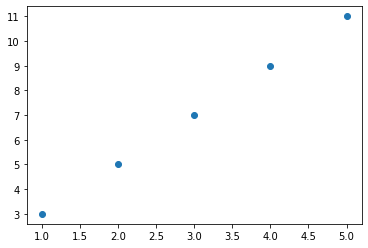

In [ ]:
plt.scatter(x=equidistantValues, y=linearTrend)
plt.show()

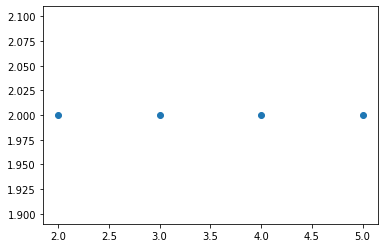

In [ ]:
constantSeries = pd.Series(linearTrend).diff()
constantSeries
plt.scatter(x=equidistantValues, y=constantSeries)
plt.show()

## iii. Det. quadratic trend
```
b0 = 1
b1 = 2
b2 = 3
n = 50
equidistantValues = 1:n
quadraticTrend = b0 + b1 * equidistantValues + b2 * equidistantValues^2
quadraticTrend
par(mfrow = c(2,1))
plot(quadraticTrend, type = "b") # both - dots and lines
linearOutput = diff(quadraticTrend)
plot(linearOutput, type = "b")
```

In [ ]:
b0 = 1
b1 = 2
b2 = 3
n = 50
equidistantValues = np.arange(1, n+1)
quadraticTrend = b0 + b1 * equidistantValues + b2 * equidistantValues**2
quadraticTrend

array([   6,   17,   34,   57,   86,  121,  162,  209,  262,  321,  386,
        457,  534,  617,  706,  801,  902, 1009, 1122, 1241, 1366, 1497,
       1634, 1777, 1926, 2081, 2242, 2409, 2582, 2761, 2946, 3137, 3334,
       3537, 3746, 3961, 4182, 4409, 4642, 4881, 5126, 5377, 5634, 5897,
       6166, 6441, 6722, 7009, 7302, 7601])

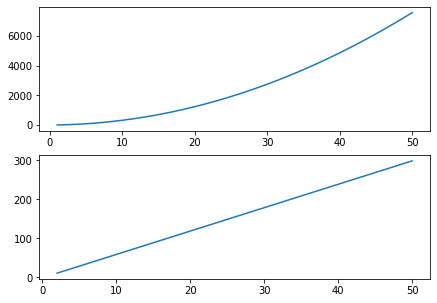

In [ ]:
figure, axes = plt.subplots(nrows=2, figsize=(7, 5))
axes[0].plot(equidistantValues, quadraticTrend)
linearOutput = np.diff(quadraticTrend)
axes[1].plot(equidistantValues[1:], linearOutput)

## iv. Det. Sinusoid with lag=period difference maps into a constant
sin(x) has period = 2*pi
sin(x*pi) has period = 2
First let us apply the regular lag=1 distance
And see that the sinosoid changes phase
```
n = 50
periodCount = 5
equidistantValues = (1:n) * 2/n * 5

sinusoidPeriod2 = sin(equidistantValues*pi)
sinusoidPeriod2
par(mfrow = c(2,1))
plot(sinusoidPeriod2, type = "b") # both - dots and lines
anotherSinusoidPeriod2 = diff(sinusoidPeriod2)
plot(anotherSinusoidPeriod2, type = "b")

# to make it constant, we need a difference of lag a period
# Now the period is 10 elementary intervals
par(mfrow = c(2,1))
plot(sinusoidPeriod2, type = "b") # both - dots and lines
shiftedByAPeriod = lag(sinusoidPeriod2, k=10)
plot(shiftedByAPeriod, type = "b")
# same as it should be!

par(mfrow = c(2,1))
plot(sinusoidPeriod2, type = "b") # both - dots and lines
constantOutput = diff(sinusoidPeriod2, lag=10)
constantOutput
plot(constantOutput, type = "b", ylim = c(-0.1, 0.1))
```

In [ ]:
n = 50
periodCount = 5
equidistantValues = np.arange(1, n+1) * 2/n * 5
equidistantValues

array([ 0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,
        2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,
        4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,  6.6,
        6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,  8.8,
        9. ,  9.2,  9.4,  9.6,  9.8, 10. ])

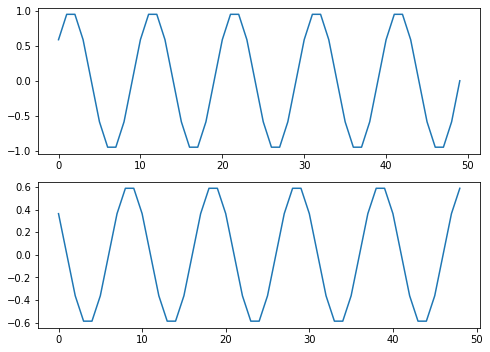

In [ ]:
sinusoidPeriod2 = np.sin(equidistantValues*np.pi)
figure, axes = plt.subplots(nrows=2, figsize=(7, 5))
axes[0].plot(sinusoidPeriod2)
anotherSinusoidPeriod2 = np.diff(sinusoidPeriod2)
axes[1].plot(anotherSinusoidPeriod2)
figure.tight_layout()
plt.show()

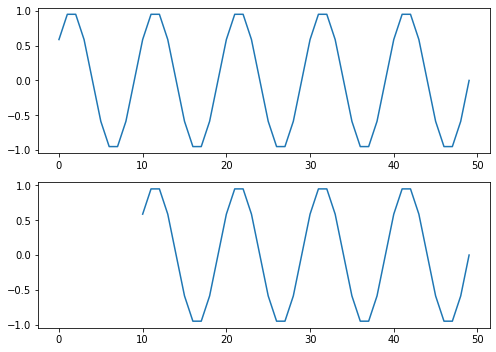

In [ ]:
# to make it constant, we need a difference of lag a period
# Now the period is 10 elementary intervals
figure, axes = plt.subplots(nrows=2, figsize=(7, 5))
axes[0].plot(sinusoidPeriod2)
shiftedByAPeriod = pd.Series(sinusoidPeriod2).shift(periods=10)
shiftedByAPeriod.plot(ax=axes[1], xlim=axes[0].get_xlim())
figure.tight_layout()
plt.show()

Same as it should be! But reduced domain. Check it

(-1.0, 1.0)

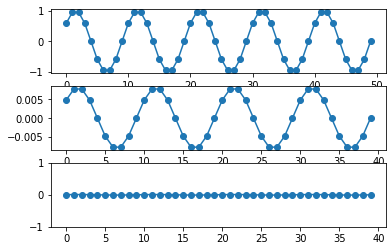

In [ ]:
fig, axes = plt.subplots(nrows = 3)
axes[0].plot(sinusoidPeriod2, marker = "o") # both - dots and lines
constantOutput = np.diff(sinusoidPeriod2, n=10)
constantOutput
axes[1].plot(constantOutput, marker = "o")
axes[2].plot(constantOutput, marker = "o")
axes[2].set_ylim(-1, 1)

## v. Det. cumulative sum, several times
```
n = 100
x = 1:n
x
par(mfrow = c(3,1))
plot(x, type = "b")
cumsumX = cumsum(x)
cumsumX
plot(cumsumX, type = "b")
difCumsumX = diff(cumsumX)
difCumsumX
# It should return it back to x with a loss 1 point
plot(difCumsumX, type = "b")
length(x)
length(cumsumX)
length(difCumsumX)
```

len(x) = 100
len(cumsumX) = 100
difCumsumX = 99


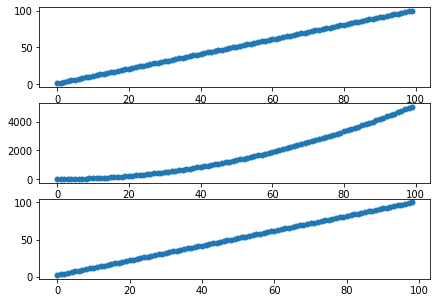

In [ ]:
n = 100
x = np.arange(1, n+1)
fig, axes = plt.subplots(nrows=3, figsize=(7, 5))
axes[0].plot(x, marker = "o", markersize=5)
cumsumX = np.cumsum(x)
axes[1].plot(cumsumX, marker = "o", markersize=5)
difCumsumX = np.diff(cumsumX)
difCumsumX
# It should return it back to x with a loss 1 point
axes[2].plot(difCumsumX, marker = "o", markersize=5)
print("len(x) =", len(x))
print("len(cumsumX) =", len(cumsumX))
print("difCumsumX =", len(difCumsumX))

## vi. iid to MA(1)
What happens to iid after differencing?
```
n = 1000
iid = rnorm(n)
iid
difIid = diff(iid)
difIid
par(mfrow = c(2,1))
plot(iid, type = "l")
plot(difIid, type = "l")
```
Visually, they are hardly distinguishable,
but difIid is no longer iid

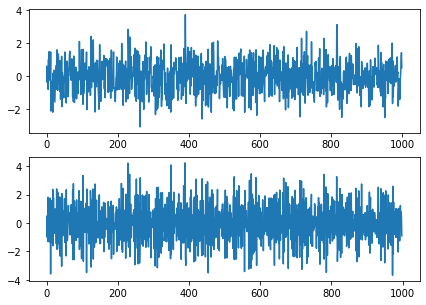

In [ ]:
n = 1000
iid = np.random.normal(size=n)
difIid = np.diff(iid)
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
axes[0].plot(iid)
axes[1].plot(difIid)

## vii. random walk, several times
```
n = 1000
iid = rnorm(n)
randomWalk = cumsum(iid)
par(mfrow = c(3,1))
plot(iid, type = "l")
plot(randomWalk, type = "l")
# Back to iid
difRandomWalk = diff(randomWalk)
plot(difRandomWalk, type = "l")
```

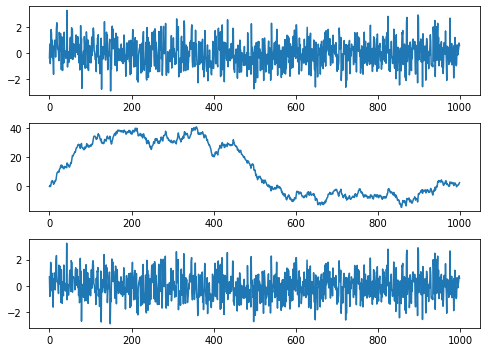

In [ ]:
n = 1000
iid = np.random.normal(size=n)
randomWalk = np.cumsum(iid)
difRandomWalk = np.diff(randomWalk)
fig, axes = plt.subplots(nrows=3, figsize=(7, 5))
axes[0].plot(iid)
axes[1].plot(randomWalk)
axes[2].plot(difRandomWalk)
fig.tight_layout()
plt.show()
# Visually, they are hardly distinguishable,
# but difIid is no longer iid

## Linear filter

```
set.seed(1)
w = rnorm(5, 0, 1) # 500 N(0,1) variates
v = filter(w, sides=2, filter=rep(1/3, 3)) # moving average
length(v)
par(mfrow=c(2,1))
plot.ts(w, main="white noise")
plot.ts(v, ylim=c(-3,3), main="moving average")

dfMatchedTime = ts.intersect(lag(w, k= -1), as.ts(w), lag(w, k = 1),
                             dframe = T)
dim(dfMatchedTime)
# First and last are dropped by intersect

vConstructed = ts(data = 1/3 * rowSums(dfMatchedTime), start = 2)
tsp(vConstructed)
par(mfrow=c(2,1))
plot.ts(w, main="white noise")
plot.ts(vConstructed, ylim=c(-3,3), main="moving average")

v = na.omit(v) # we need to remove NAs at the start and end of v
tsp(v)
par(mfrow=c(1, 1))
plot(v, type='l')
lines(vConstructed, col='red')

myDif = v - vConstructed
myDif
```

moving average length = 5


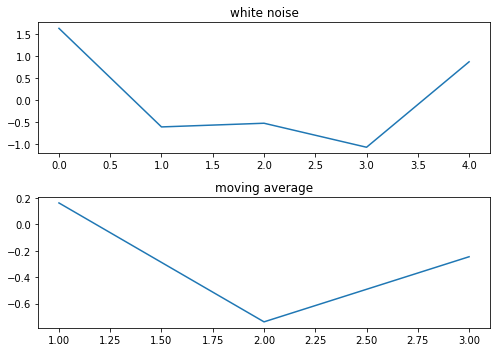

In [ ]:
np.random.seed(1)
w = np.random.normal(size=5) # 5 ponts of N(0, 1) variates
v = sm.tsa.filters.convolution_filter(w, filt=np.repeat(1/3, 3), nsides=2) # moving average
print("moving average length =", len(v))

fig, axes = plt.subplots(nrows=2, figsize=(7, 5))

axes[0].plot(w)
axes[0].set_title("white noise")

axes[1].plot(v)
axes[1].set_title("moving average")

fig.tight_layout()
plt.show()

In [ ]:
w = pd.Series(w)
dfMatchedTime = pd.concat([w.shift(), w, w.shift(-1)], axis=1).dropna()
dfMatchedTime.shape
# First and last are dropped by intersect

(3, 3)

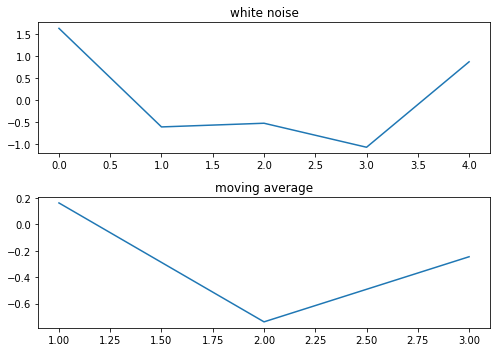

In [ ]:
vConstructed = pd.Series(1/3 * dfMatchedTime.sum(axis=1))

fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
w.plot(ax=axes[0], title="white noise")
vConstructed.plot(ax=axes[1], title="moving average")
fig.tight_layout()
plt.show()

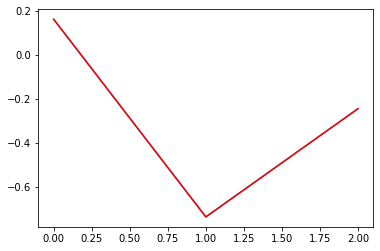

In [ ]:
v = v[~np.isnan(v)] # we need to remove NAs at the start and end of v

plt.plot(v)
plt.plot(vConstructed.to_numpy(), color='red')

In [ ]:
myDif = v - vConstructed
myDif

1   -5.551115e-17
2    0.000000e+00
3    0.000000e+00
dtype: float64